# Aim
- **Objective:** Use Support Vector Regression (SVR) to model a 2D non-linearly separable dataset.
- **Workflow:** Generate a synthetic 2D dataset with a non-linear function, split it into training and testing sets, train an SVR (with hyperparameter tuning) using an RBF kernel, and evaluate its performance using multiple metrics and visualizations.

# Algorithm
1. **Data Generation & Splitting:**
   - Create a synthetic 2D dataset with non-linear relationships and additive noise.
   - Split the data into training and testing sets.
2. **Pipeline & Hyperparameter Tuning:**
   - Build a pipeline with data standardization and SVR.
   - Use GridSearchCV (with a reduced grid for speed) to tune SVR hyperparameters.
3. **Model Evaluation:**
   - Compute evaluation metrics: R², Mean Squared Error (MSE), and Mean Absolute Error (MAE) on both training and test sets.
4. **Visualizations:**
   - 3D scatter plot with the regression surface.
   - Contour plot of predicted values.
   - Error histogram for residual analysis.
   - 2D scatter plots comparing true vs predicted targets.

# Algorithm Description
- **Support Vector Regression (SVR):**  
  SVR models the relationship between inputs and targets by fitting a function that deviates from the actual targets by a value no greater than a specified margin (epsilon). Using the RBF kernel, SVR captures complex, non-linear relationships by mapping inputs into a higher-dimensional space.
- **Evaluation & Visualization:**  
  Multiple visualizations (3D, contour, and error plots) along with detailed evaluation metrics provide insight into the model’s performance, error distribution, and fit quality.

## Result

### Training Metrics:
- **R² Score:** 0.9607  
- **Mean Squared Error (MSE):** 0.0369 
- **Mean Absolute Error (MAE):** 0.1548  

### Testing Metrics:
- **R² Score:** 0.9538
- **Mean Squared Error (MSE):** 0.0455
- **Mean Absolute Error (MAE):** 0.1675  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
np.random.seed(42)
n_samples = 1000

In [3]:
X = np.random.rand(n_samples, 2) * 10
y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.random.normal(0, 0.2, n_samples)

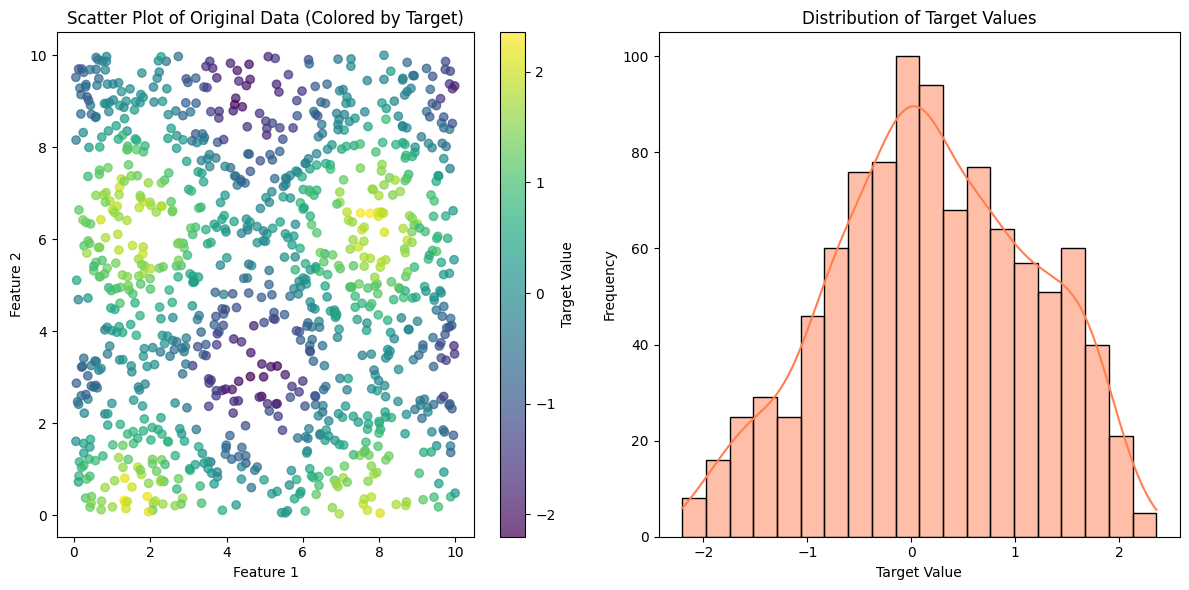

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Original Data (Colored by Target)")
plt.colorbar(scatter, label="Target Value")

plt.subplot(1, 2, 2)
sns.histplot(y, bins=20, kde=True, color='coral')
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Values")

plt.tight_layout()
plt.show()

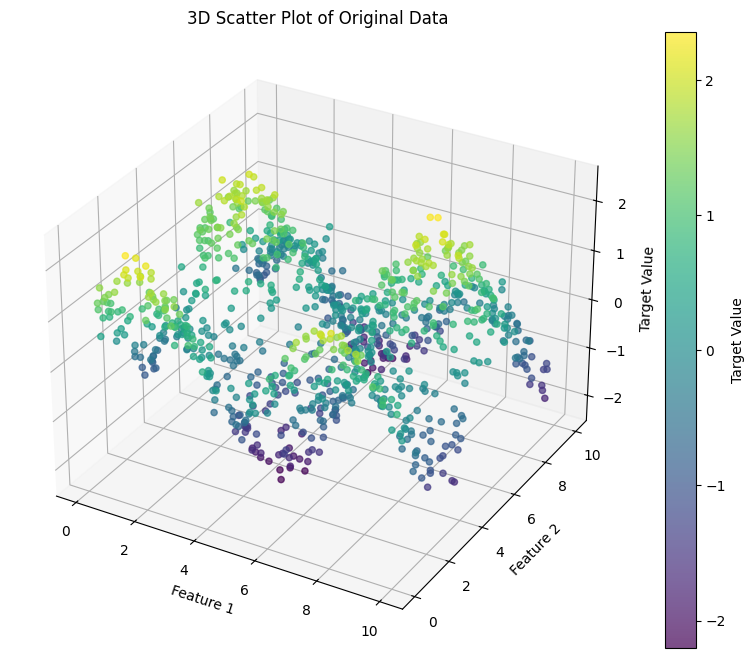

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', alpha=0.7)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target Value")
ax.set_title("3D Scatter Plot of Original Data")
fig.colorbar(sc, ax=ax, label="Target Value")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

In [8]:
param_grid = {
    'svr__C': [1, 10, 100, 1000],
    'svr__epsilon': [0.01, 0.05, 0.1, 0.2],
    'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

In [9]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'svr__C': 100, 'svr__epsilon': 0.2, 'svr__gamma': 'scale'}


In [10]:
best_model = grid_search.best_estimator_

In [11]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [12]:
def print_metrics(y_true, y_pred, set_name="Dataset"):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{set_name} Metrics:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}\n")

print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_test, y_test_pred, "Testing")

Training Metrics:
  R² Score: 0.9607
  MSE: 0.0369
  MAE: 0.1548

Testing Metrics:
  R² Score: 0.9538
  MSE: 0.0455
  MAE: 0.1675



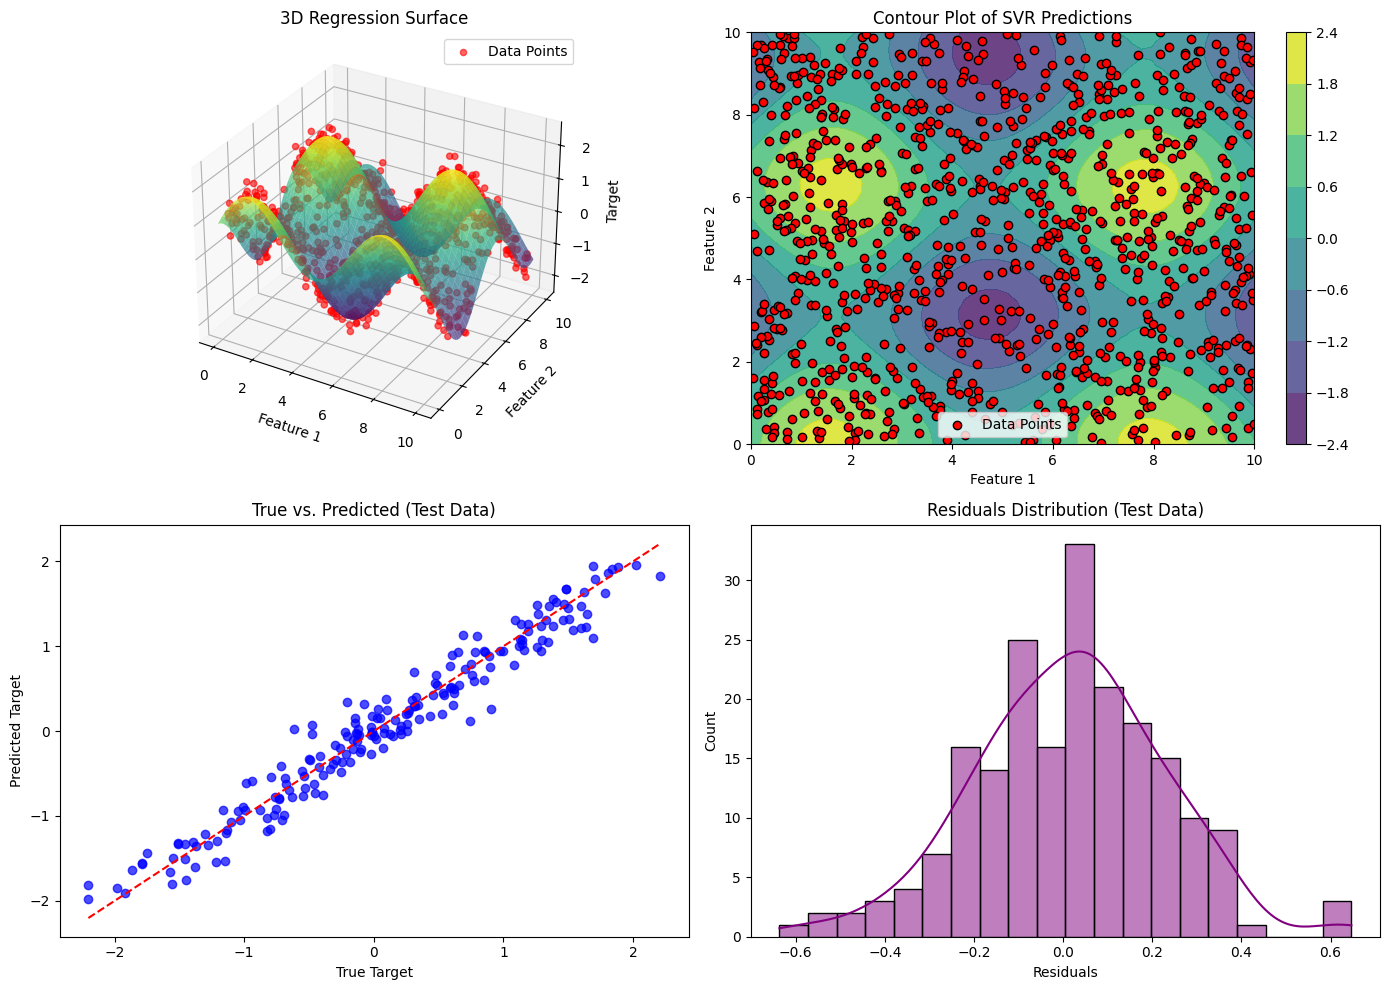

In [13]:
grid_x = np.linspace(0, 10, 50)
grid_y = np.linspace(0, 10, 50)
xx, yy = np.meshgrid(grid_x, grid_y)
grid_points = np.c_[xx.ravel(), yy.ravel()]
zz = best_model.predict(grid_points).reshape(xx.shape)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red', label='Data Points', alpha=0.6)
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.7)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target")
ax.set_title("3D Regression Surface")
ax.legend()

ax2 = fig.add_subplot(222)
contour = ax2.contourf(xx, yy, zz, cmap='viridis', alpha=0.8)
plt.colorbar(contour, ax=ax2)
ax2.scatter(X[:, 0], X[:, 1], c='red', edgecolor='k', label='Data Points')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_title("Contour Plot of SVR Predictions")
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
ax3.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax3.set_xlabel("True Target")
ax3.set_ylabel("Predicted Target")
ax3.set_title("True vs. Predicted (Test Data)")

residuals = y_test - y_test_pred
ax4 = fig.add_subplot(224)
sns.histplot(residuals, bins=20, kde=True, ax=ax4, color='purple')
ax4.set_xlabel("Residuals")
ax4.set_title("Residuals Distribution (Test Data)")

plt.tight_layout()
plt.show()